/Users/idrees/Code/Avalanche_Research/subnet-simulation-engine/simulation_engine
['/Users/idrees/Code/Avalanche_Research/subnet-simulation-engine', '/Users/idrees/Code/Avalanche_Research/subnet-simulation-engine', '/opt/homebrew/Cellar/python@3.9/3.9.19_1/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/opt/homebrew/Cellar/python@3.9/3.9.19_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/opt/homebrew/Cellar/python@3.9/3.9.19_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/idrees/Code/Avalanche_Research/subnet_venv/lib/python3.9/site-packages']
Plotting data: {'validators_status': ['honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'malicious', 'honest', 'malicious', 'honest', 'malicious', 'malicious', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest', 'honest',

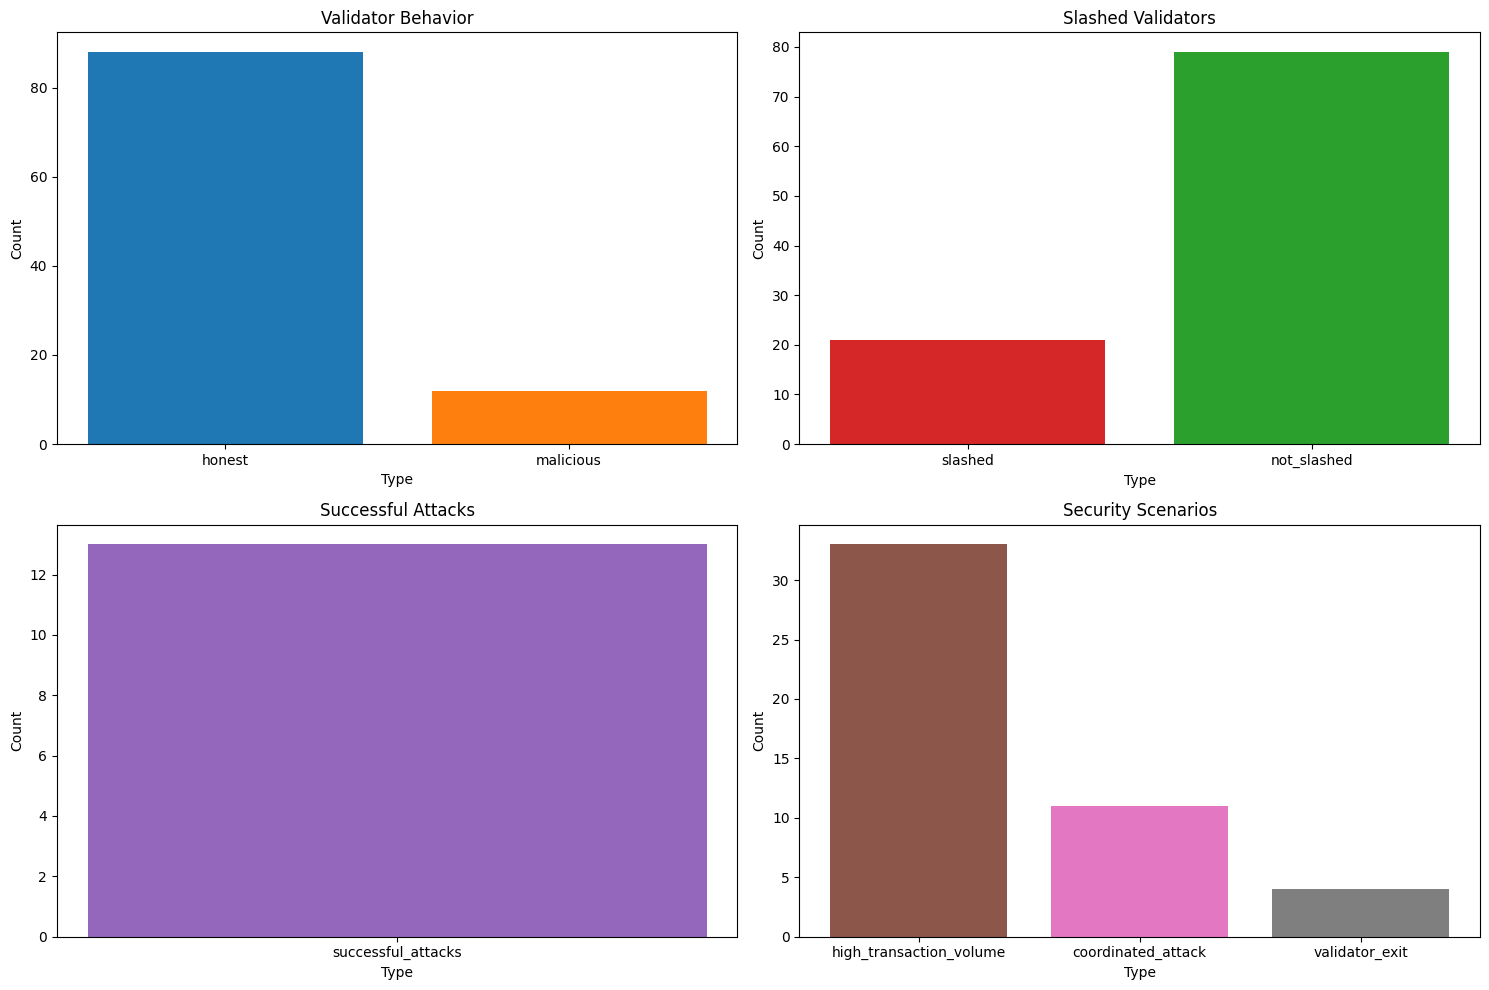

In [2]:
# Step 1: Import necessary modules and classes
import sys
import os
import json
import matplotlib.pyplot as plt

# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))


from simulation_engine.config.config_manager import ConfigManager
from simulation_engine.core.security_model import SecurityModel

# Plot Results
def plot_results(data):
    print("Plotting data:", data)  # Debugging print
    
    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Plot validators status
    if 'validators_status' in data:
        status_counts = {'honest': data['validators_status'].count('honest'), 'malicious': data['validators_status'].count('malicious')}
        axs[0, 0].bar(status_counts.keys(), status_counts.values(), color=['#1f77b4', '#ff7f0e'])
        axs[0, 0].set_title('Validator Behavior')
        axs[0, 0].set_ylabel('Count')

    # Plot slashed validators
    if 'slashed_validators' in data:
        slashed_counts = {'slashed': len(data['slashed_validators']), 'not_slashed': len(data['validators_status']) - len(data['slashed_validators'])}
        axs[0, 1].bar(slashed_counts.keys(), slashed_counts.values(), color=['#d62728', '#2ca02c'])
        axs[0, 1].set_title('Slashed Validators')
        axs[0, 1].set_ylabel('Count')

    # Plot successful attacks
    if 'successful_attacks' in data:
        axs[1, 0].bar(['successful_attacks'], [data['successful_attacks']], color=['#9467bd'])
        axs[1, 0].set_title('Successful Attacks')
        axs[1, 0].set_ylabel('Count')

    # Plot security scenarios
    if 'security_scenarios' in data:
        axs[1, 1].bar(data['security_scenarios'].keys(), data['security_scenarios'].values(), color=['#8c564b', '#e377c2', '#7f7f7f'])
        axs[1, 1].set_title('Security Scenarios')
        axs[1, 1].set_ylabel('Count')

    # Adjust layout and add labels
    for ax in axs.flat:
        ax.set_xlabel('Type')
        ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()


# Adjust the file path as needed based on your current working directory
config_file = '../examples/example_security_model.json'
config = ConfigManager.load_config(config_file)


security_model = SecurityModel(config['slashing_conditions'])
security = security_model.simulate_security()


validators_status = security['validators_status']
slashed_validators = security['slashed_validators']
successful_attacks = security['successful_attacks']
security_scenarios = security['security_scenarios']

# Combine data for plotting
plot_data = {
    'validators_status': validators_status,
    'slashed_validators': slashed_validators,
    'successful_attacks': successful_attacks,
    'security_scenarios': security_scenarios
}

plot_results(plot_data)
